---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../../../data/train.p'
testing_file =  '../../../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Done loading data')

Done loading data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = "{}x{}".format(len(X_train[0]),len(X_train[0][0]))

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
#Plot function

"""
This is a worker function that plots a group of
images in a single figure.
"""
def plot_images(images, n_imgs, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == n_imgs
    assert not n_imgs % 5
    
    # Create figure with sub-plots.
    
    fig, axes = plt.subplots(n_imgs//5,5)
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    
    image_shape = images.shape[1:3]

    for i, ax in enumerate(axes.flat):
        # Plot image.
        if images.shape[-1]==1: 
            ax.imshow(images[i].reshape(image_shape), cmap='gray')
        else:
            ax.imshow(images[i])

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "{0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

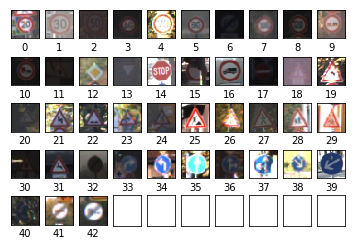

In [5]:
#Plot one image of each class

#(1) Get the first entry of each class image from the training set
first_indices=[]
for class_num in range(n_classes):
    ind = np.where(y_train==class_num)[0][0]
    first_indices.append(ind)

#(2) Plot all the images in 4 rows
fig, axes = plt.subplots(5,10)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, ax in enumerate(axes.flat):
    if i<n_classes: 
        ax.imshow(X_train[first_indices[i]])
        xlabel = "{0}".format(i)
        ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])    
  
plt.show()


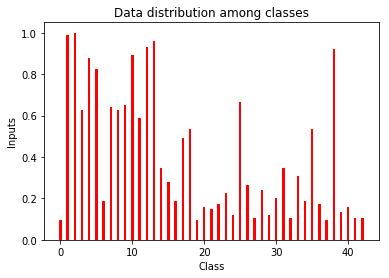

In [6]:
#Check the histogram of the data.
#This step is important to see the distribution of data among different classes. Ideally we would want to have equal number
# of samples per class. If this is not the case, we would want to synthesize data to bring uniform distribution among classes.

inputs_per_class = np.bincount(y_train)
max_inputs = np.max(inputs_per_class)


fig, ax = plt.subplots(1,1)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Data distribution among classes')
ax.bar(range(len(inputs_per_class)), (inputs_per_class/max_inputs), 1/3, color='red', label='Inputs per class')
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
#PREPROCESS STEP 1 - DATA AUGMENTATION BY ROTATION.

#The first preprocessing step that we apply is to synthesize data artificially and augment with the existing database. 
#This is done to bring uniform distribution of data among all the classes. We perform rotation on the existing training
#samples to generate new training samples.

# set the seed for reproducible results
np.random.seed(seed=50)

ANGLE_RANGE=15

#Worker function to rotate the image
def random_rotate_image(img, angle_range):
    rows,cols,ch = img.shape 
    p=10 #pad the image
    angle_rot = np.random.uniform(angle_range)-angle_range/2
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),angle_rot,1)
    wrap = cv2.copyMakeBorder(img,p,p,p,p,cv2.BORDER_REFLECT)
    img = cv2.warpAffine(wrap,Rot_M,(cols+2*p,rows+2*p))
    img = img[p:p+cols,p:p+rows]
    return img

#We compare the samples per class with the maximum number and generate rotated images.
def image_augment_rotate():
    print('Data augmentation by rotation')

    X_rot = []
    y_rot_labels = []
    count = 0
    for i in range(len(inputs_per_class)):
        input_ratio = (int(max_inputs / inputs_per_class[i]) - 1)
        #print(input_ratio)

        if input_ratio <= 1:
            continue

        mask = np.where(y_train == i)

        for j in range(input_ratio):
            for img in X_train[mask]:
                X_rot.append(random_rotate_image(img, ANGLE_RANGE))
                y_rot_labels.append(i)

    print('Data augmentation by rotation - complete')
    
    return X_rot, y_rot_labels 

X_augment = []
y_augment = []
X_rot, y_rot_labels = image_augment_rotate()

X_augment = np.append(X_train, X_rot, axis=0)
print('Augmented training set',X_augment.shape)

y_augment = np.append(y_train, y_rot_labels, axis=0)
print('Augmented training labels',y_augment.shape)

Data augmentation by rotation
Data augmentation by rotation - complete
Augmented training set (80337, 32, 32, 3)
Augmented training labels (80337,)


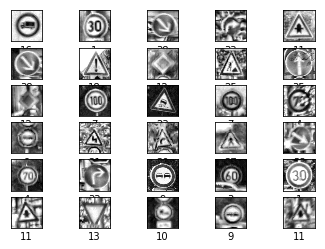

In [9]:
#PREPROCESS STEP 2 - RGB2Gray -> Normalize

#In the second step of preprocessing we define a preprocess pipeline that does the following:
# (a) RGB to Graysacle conversion.
# (b) Local Contrast Normalization
# (c) Normalize the intensity values

def RGB2gray(img):
    """Applies the Grayscale transform on RGB image
       This will return an image with only one color channel
    """
    shape = img.shape    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((shape[0],shape[1],1))
    return img

def LocalContrastNorm(img):
    """
    #Apply local contrast maximization to a single channel uint8 image
    """
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
    img_clahe = clahe.apply(img)
    return img_clahe
            
def normalize(img):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1;b = 0.9; Xmin = 0.0;Xmax = 255.0;
    X = img;
    Xnorm = a + (X-Xmin)*(b-a)/(Xmax-Xmin)
    return Xnorm

# this function will be used to preprocess all images
def preprocess_images(images):    
    shape = images.shape 
    out_img_shape=(shape[1],shape[2],1)
    batch = np.zeros((shape[0],shape[1],shape[2],1))
    
    for i in range(len(images)):        
        img = images[i,:]        
        img = RGB2gray(img)        
        img =  LocalContrastNorm(img).reshape(out_img_shape)
        img = normalize(img)        
        batch[i] = img
    return batch

# plot a few to see the result
n_imgs=30
cls_true = y_test[0:n_imgs]
images = preprocess_images(X_test[0:n_imgs])
plot_images(images=images, n_imgs=n_imgs, cls_true=cls_true)

In [10]:
#VALIDATION SET CREATION

#In this step, we split the training samples into training set and validation set. Validation set is a test set
# that shows how good our model is learning during the training phase.

print('In validation set creation')

from sklearn.model_selection import train_test_split
X_train_tmp1, X_validation_tmp1, y_train, y_validation = train_test_split(
   X_augment,
   y_augment,
   test_size=0.2,
   random_state=732289
)

print('In validation set creation - complete')

In validation set creation
In validation set creation - complete


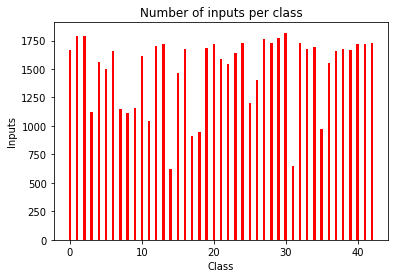

In [11]:
#Check that the data distribution is uniform(more or less) acrosee different classes.

inputs_per_class = np.bincount(y_train)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='red', label='Inputs per class')
plt.show()

In [12]:
#Shuffle the training and validation data to destroy any pattern in the sets that go
# to batches while training.

print('Shuffle data')
from sklearn.utils import shuffle
X_train_tmp2, y_train = shuffle(X_train_tmp1, y_train, random_state=0)
X_validation_tmp2, y_validation = shuffle(X_validation_tmp1, y_validation, random_state=0)
print('Shuffle data complete')

Shuffle data
Shuffle data complete


In [13]:
#Preprocess all the images

X_train = preprocess_images(X_train_tmp2)
X_validation   = preprocess_images(X_validation_tmp2)
X_test_processed  = preprocess_images(X_test)

# sanity check of data
print('classes in training set', len(set(y_train))) # number of classes in new training set
print('classes in validation set',len(set(y_validation)))   # number of classes in validation set
print('classes in test set',len(set(y_test)))   # number of classes in test set

print('Training set',X_train.shape, ', y_train',y_train.shape)
print('Validation set',X_validation.shape,', y_validation',y_validation.shape)
print('Test set',X_test.shape,', y_test ',y_test.shape)

classes in training set 43
classes in validation set 43
classes in test set 43
Training set (64269, 32, 32, 1) , y_train (64269,)
Validation set (16068, 32, 32, 1) , y_validation (16068,)
Test set (12630, 32, 32, 3) , y_test  (12630,)


In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [15]:
#Setup tensorflow

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

print('Set Epoch to',EPOCHS, 'Batch Size to',BATCH_SIZE)

Set Epoch to 50 Batch Size to 128


In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [18]:
rate = 0.0007

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

Training...
EPOCH 1 ...
Validation Accuracy = 0.769

EPOCH 2 ...
Validation Accuracy = 0.867

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.963

EPOCH 7 ...
Validation Accuracy = 0.965

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.978

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.982

EPOCH 15 ...
Validation Accuracy = 0.984

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.988

EPOCH 21 ...
Validation Accuracy = 0.978

EPOCH 22 ...
Validation Accuracy = 0.985

EPOCH 23 ...
Validation Accuracy = 0.985

EPOCH 24 ...
Validation Accurac

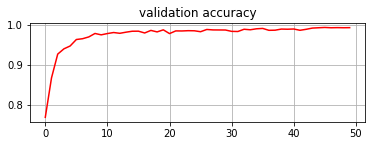

Model saved


In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    val_accuracy_vec = []
    
    print("Training...")
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
    
        val_accuracy_vec.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
        
    #print(val_accuracy_vec)    
    xVec = range(EPOCHS)
    fig = plt.figure()
    acc_plot = fig.add_subplot(212)
    acc_plot.set_title('validation accuracy')
    acc_plot.plot(xVec, val_accuracy_vec, 'r', label='validation Accuracy')

    #for i,j in zip(xVec,val_accuracy_vec):
     #   acc_plot.annotate('%s)' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
     #   acc_plot.annotate('(%s,' %i, xy=(i,j))
  
    plt.grid()
    plt.show()
        
    saver.save(sess, 'lenet')
    print("Model saved")

In [31]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    #X_test = X_test / 255. * 0.8 + 0.1
    
    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.936


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer**:
As mentioned above, the images do not have a good contrast. Also the data distribution is not even. We performed the following preprocessing steps on the images.

1. Data augmentation by rotation - This is a standard step to synthesize images. In order to make the distribution of data uniform among all the classes, we rotate the existing training images by a random angle between -7.5 degrees to +7.5 degrees.

2. RGB to grayscale conversion: Motivated by the paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by Le Cun et all, we convert the RGB images to grayscale, to achieve better accuracy.

3. Local contrast optimization(CLAHE): Again taking cue from the paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by Le Cun et all and the post http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html we perform local contrast enhancement to improve the overall contrast of the images.

4. Normalization: This is the last step of preprocessing the pipeline, where we normalize the intensity values from 0-255 to 0.1 to 0.9. Normalization aids the deep neural network to learn quickly as the range of values are much lesses compared to original pixel values.


In [23]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
As mentioned above, we generate additional data by rotating the existing training images.
1. We further split the training data into training and validation data in the ration of 80% to 20%. We apply the preprocessing steps on all the three sets of data(training, validation and testing). Note that we dont apply rotation step on test data.

2. We shuffle the training and validation data to break any pattern in the data set, so that no epoch gets data from a single class. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I adopted the Lenet architecture (from the class lectures) as it is very well suited for classification tasks on images of this dimension (32x32). 

Note: I wanted to try out the multi scale approach of LeCun et all, but because of time constraint, I had to switch to Lenet. One thing that I want to try next is to use the multi scale network and see the performance.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. I started with a learning rate of 0.01, but observed that validation accuracy was not consistently increasing with training. Then I experimented with learning rate of 0.001, but found that best validation occured with 0.007.

2. Initially I had set the batch size to 64, but found that validation error does not decrease significantly over training. I then increased to 128, which gave reasonable results.

3. I used Adam optimizer as it was taught in the lessons that I need not worry about finer hyperparameter details if I use the Adam optimizer.

4. I used the binary search approach for choosing the epochs size. With epoch size of 30, the model was just learning and with epoch size of 75, the learning saturated beyond 50(I plotted a graph to observe this). So, the best bet was 50 epochs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I used the Lenet model as it is well known to give good results on digit recognition for images of similar size (28x28). Also, I had to finetune the parameters to get to this accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

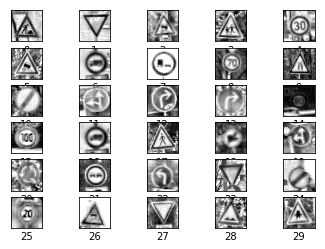

In [25]:
first_indices=[]
n_imgs=30
for class_num in range(n_imgs):
    ind = np.where(y_train==class_num)[0][0]
    first_indices.append(ind)
    
#print(first_indices)

cls_true = range(n_imgs)
Xprime = X_train_tmp2[first_indices]
images = preprocess_images(Xprime)
plot_images(images=images, n_imgs=n_imgs, cls_true=cls_true)

In [97]:
#Load new images. In this cell I load new images which are not part of the training, validation, test sets.
#I have taken some of the images from https://github.com/ksakmann/CarND-TrafficSignClassifier/ and rest from the internet.

import matplotlib.image as mpimg

images = ['new1.jpg',  'new2.jpg',   'new3.jpg',  'new4.jpg',  'new5.jpg',
          'new6.jpg',  'new7.jpg',  'new8.jpg',  'new9.jpg',  'new10.jpg']

#The correct labels of the images(referred to signnames.csv)
y_test_new_preprocessed = [13, 17, 25, 33, 37, 15, 25, 27, 36, 39]
n_imgs = len(images)

shape=(n_imgs,32,32,3);
X_extra = np.zeros(shape,dtype='uint8')

def crop_image(image):
    crop = cv2.resize(image,(32,32))
    return crop

i=0
for img_name in images:
    img = plt.imread('new_images/' + img_name)
    img = crop_image(img)    
    X_extra[i]=img
    i = i+1
      

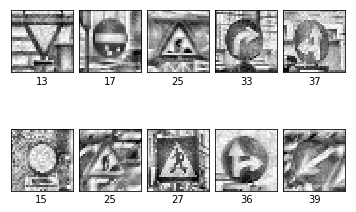

In [98]:
#In this cell we preprocess the images
 
X_test_new_preprocessed = preprocess_images(X_extra)
X_test_new_preprocessed = X_test_new_preprocessed.astype(np.float32)

plot_images(images=X_test_new_preprocessed, n_imgs=n_imgs, cls_true=y_test_new_preprocessed)       

In [99]:
# We evaluate the accuracy of the new images.

BATCH_SIZE=5

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
        
    test_accuracy = evaluate(X_test_new_preprocessed, y_test_new_preprocessed)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


In [101]:
#It can be seen that the accuracy is 0.80, that means, 8 out of 10 images were correctly classified.

In [102]:
#Find the class label 
BATCH_SIZE=1

prediction_label = tf.argmax(logits, 1)
#prediction_label = tf.nn.top_k(logits, k=3)

def class_predict(X_data):
    num_examples = len(X_data)
    pred_array = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(prediction_label, feed_dict={x: batch_x})
       
        print("Actual class is [{}] and predicted class is {}".format(y_test_new_preprocessed[offset], accuracy))
        pred_array = [pred_array, accuracy]
    return pred_array

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
        
    test_class_id = class_predict(X_test_new_preprocessed)
        

Actual class is [13] and predicted class is [13]
Actual class is [17] and predicted class is [34]
Actual class is [25] and predicted class is [25]
Actual class is [33] and predicted class is [33]
Actual class is [37] and predicted class is [37]
Actual class is [15] and predicted class is [15]
Actual class is [25] and predicted class is [25]
Actual class is [27] and predicted class is [27]
Actual class is [36] and predicted class is [38]
Actual class is [39] and predicted class is [39]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

**As could be seen from the new set of images that the second image could not be classified correctly. It could be possible that 
  the background of the image is not clear and making the network's job more difficult**
  
** The images have been plotted above**  

In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

**The network is able to detect 8 images correctly from a set of 10. I expect that this network has generalized well**

In [30]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [103]:
#Softmax probablities

BATCH_SIZE=1

sft_max = tf.nn.softmax(logits)
sft_max_topK = tf.nn.top_k(sft_max, k=3)

def sft_max_pred(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        topK = sess.run(sft_max_topK, feed_dict={x: batch_x})
        print('{}'.format(topK))
    return pred_array

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
        
    test_class_id = sft_max_pred(X_test_new_preprocessed)    

TopKV2(values=array([[  1.00000000e+00,   2.06452737e-11,   5.53127205e-13]], dtype=float32), indices=array([[13, 38, 10]], dtype=int32))
TopKV2(values=array([[  9.93504226e-01,   6.49368064e-03,   2.06693289e-06]], dtype=float32), indices=array([[34, 35,  9]], dtype=int32))
TopKV2(values=array([[  9.99941707e-01,   3.07087284e-05,   2.60367942e-05]], dtype=float32), indices=array([[25, 11,  2]], dtype=int32))
TopKV2(values=array([[  9.99994516e-01,   3.86089778e-06,   1.65837378e-06]], dtype=float32), indices=array([[33,  3, 35]], dtype=int32))
TopKV2(values=array([[  9.99989986e-01,   9.85957286e-06,   7.91819659e-08]], dtype=float32), indices=array([[37, 21, 24]], dtype=int32))
TopKV2(values=array([[  9.99957800e-01,   4.14272727e-05,   2.73622049e-07]], dtype=float32), indices=array([[15,  9, 38]], dtype=int32))
TopKV2(values=array([[ 0.48165542,  0.46890032,  0.02421033]], dtype=float32), indices=array([[25, 37, 21]], dtype=int32))
TopKV2(values=array([[  9.30026352e-01,   6.99731

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

(1) **As can be seen from the softmax probablities, all the correct classifications fall in the range of 99% confidence.** 

(2) **For one of the wrongly predicted class(actual-17, predicted-34), the correct class(17) is not present in top 3 predictions.**

(3) **For one of the wrongly predicted class(actual-36, predicted-38), the correct class(36) is present in top 3 predictions.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.